In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures


import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv('data\data.csv')
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,6109,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,6109,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,6109,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,6109,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,6109,7.7143


In [4]:
data.shape

(174830, 10)

In [5]:
le_strat_code = LabelEncoder()

le_strat_code.fit(data['№_скважины'])
LabelEncoder()
list(le_strat_code.classes_)
data['№_скважины']=le_strat_code.transform(data['№_скважины'])

In [6]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,2,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,2,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,2,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,2,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,2,7.7143


In [7]:
data['Код_стратиграфии'].value_counts()

622    51906
621    16541
34     15868
361    14748
39     14565
61      9118
362     6430
35      6409
32      6294
360     6041
60      5750
31      4928
50      4322
40      3375
38      3180
37      2416
33      2128
20       798
10        13
Name: Код_стратиграфии, dtype: int64

In [8]:
data['Код_стратиграфии'].unique()

array([ 20,  31,  32,  33,  34,  35, 361, 362,  37,  38,  39,  40,  50,
        60,  61, 621, 622,  10, 360], dtype=int64)

<AxesSubplot:>

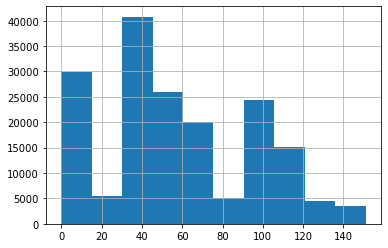

In [9]:
data['Скорость_ротора'].hist()

<AxesSubplot:>

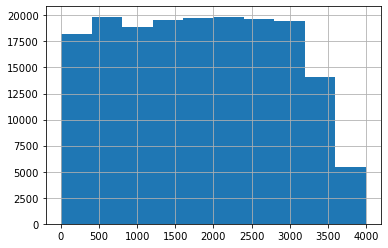

In [10]:
data['Глубина_м'].hist()

<AxesSubplot:>

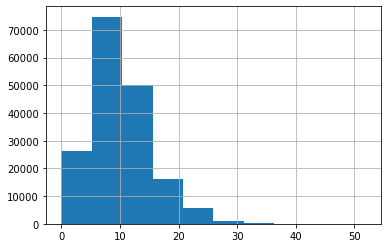

In [11]:
data['Нагрузка_на_долото_тонн'].hist()

<AxesSubplot:>

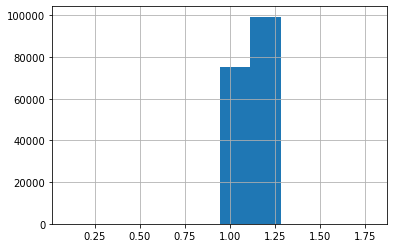

In [12]:
data['Плотность_на_входе_кг/м3'].hist()

<AxesSubplot:>

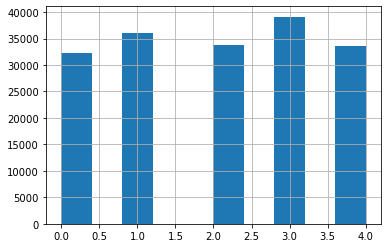

In [13]:
data['№_скважины'].hist()

<AxesSubplot:>

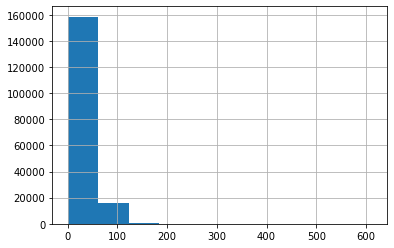

In [14]:
data['Ср_мех_скорость_м/ч'].hist()

In [15]:
len(data)

174830

### Код стратиграфии 39

In [16]:
data=data[data['Код_стратиграфии']==39]

In [17]:
#Сформируем датасет без кода стратиграфии
data=data.drop('Код_стратиграфии', axis=1)

In [18]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,№_скважины,Ср_мех_скорость_м/ч
13731,13731,1440.0,13.0,0,1.05,34.0710,178,2,22.5000
13732,13732,1440.1,14.0,0,1.05,34.0710,178,2,32.7273
13733,13733,1440.2,15.0,0,1.05,34.0710,178,2,27.6923
13734,13734,1440.3,13.0,0,1.05,34.0710,178,2,15.0000
13735,13735,1440.4,13.0,0,1.05,34.2467,178,2,27.6923


In [19]:
y=data['Ср_мех_скорость_м/ч']
#X=data.iloc[:, 1:-1]

In [20]:
y.head()

13731    22.5000
13732    32.7273
13733    27.6923
13734    15.0000
13735    27.6923
Name: Ср_мех_скорость_м/ч, dtype: float64

In [21]:
#X.head()

In [22]:
data['№_скважины'].value_counts()

3    3306
1    2945
2    2920
4    2854
0    2540
Name: №_скважины, dtype: int64

In [23]:
data['Диам_скваж_мм'].value_counts()

178    14565
Name: Диам_скваж_мм, dtype: int64

<AxesSubplot:>

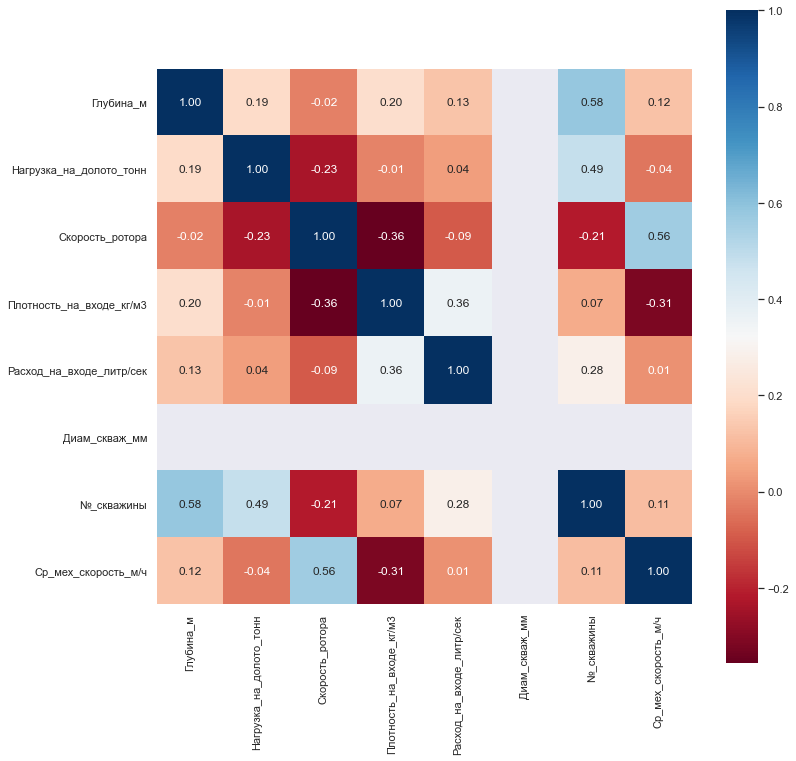

In [24]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


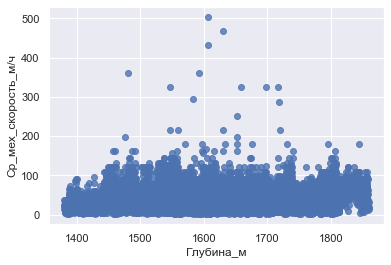

In [25]:
sns.regplot(x='Глубина_м', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

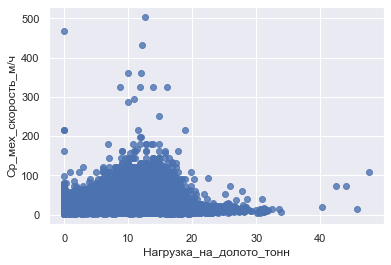

In [26]:
sns.regplot(x='Нагрузка_на_долото_тонн', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

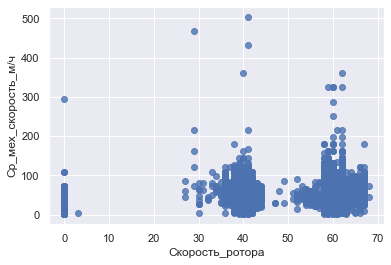

In [27]:
sns.regplot(x='Скорость_ротора', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

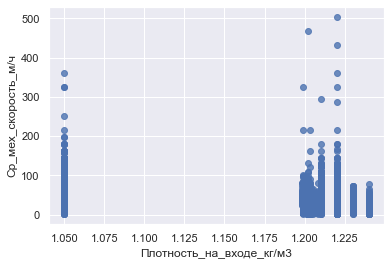

In [28]:
sns.regplot(x='Плотность_на_входе_кг/м3', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

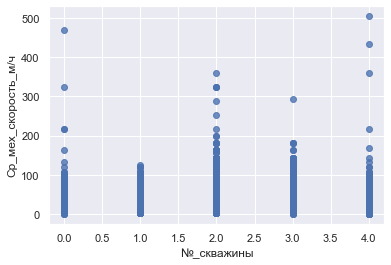

In [29]:
sns.regplot(x='№_скважины', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

In [30]:
data=data.drop(['Расход_на_входе_литр/сек','Диам_скваж_мм'], axis = 1)
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
13731,13731,1440.0,13.0,0,1.05,2,22.5000
13732,13732,1440.1,14.0,0,1.05,2,32.7273
13733,13733,1440.2,15.0,0,1.05,2,27.6923
13734,13734,1440.3,13.0,0,1.05,2,15.0000
13735,13735,1440.4,13.0,0,1.05,2,27.6923


In [31]:
X=data.iloc[:, 1:-1]

<AxesSubplot:>

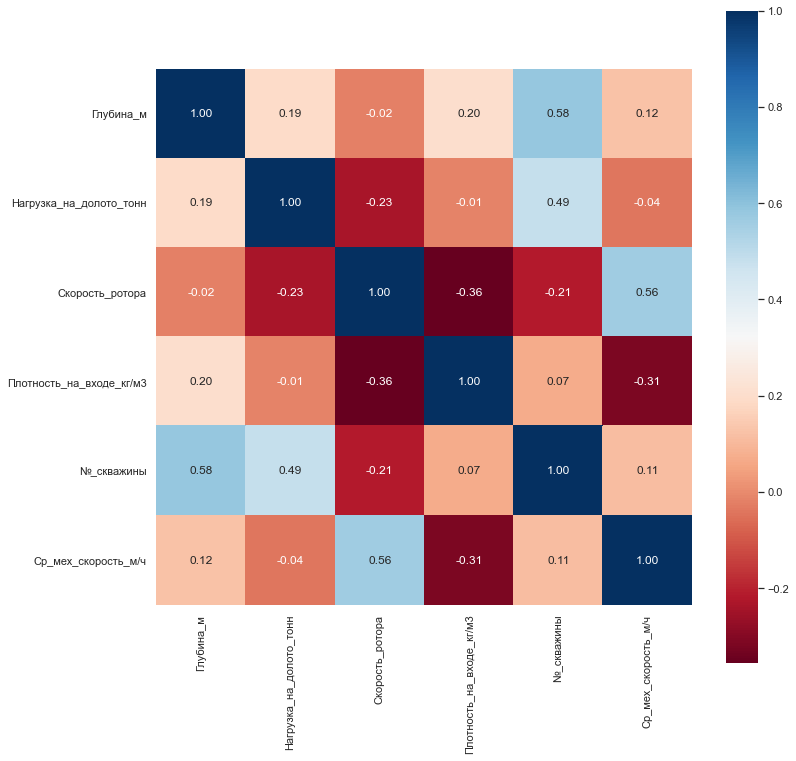

In [32]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Model1=LinearRegression()
Model1.fit(X_train, y_train)
y_pred=Model1.predict(X_test)
y_pred;

In [34]:
print('MSE=', mean_squared_error(y_pred, y_test))
print('MAE=', mean_absolute_error(y_pred, y_test))
print ('R-squared=', Model1.score(X_train, y_train))

MSE= 485.4504805988806
MAE= 14.093356177817862
R-squared= 0.4010620023746174


##### Полиномы

In [35]:
data_sq=data*data
data_sq.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
13731,188540361,2073600.00,169.0,0,1.1025,4,506.250000
13732,188567824,2073888.01,196.0,0,1.1025,4,1071.076165
13733,188595289,2074176.04,225.0,0,1.1025,4,766.863479
13734,188622756,2074464.09,169.0,0,1.1025,4,225.000000
13735,188650225,2074752.16,169.0,0,1.1025,4,766.863479


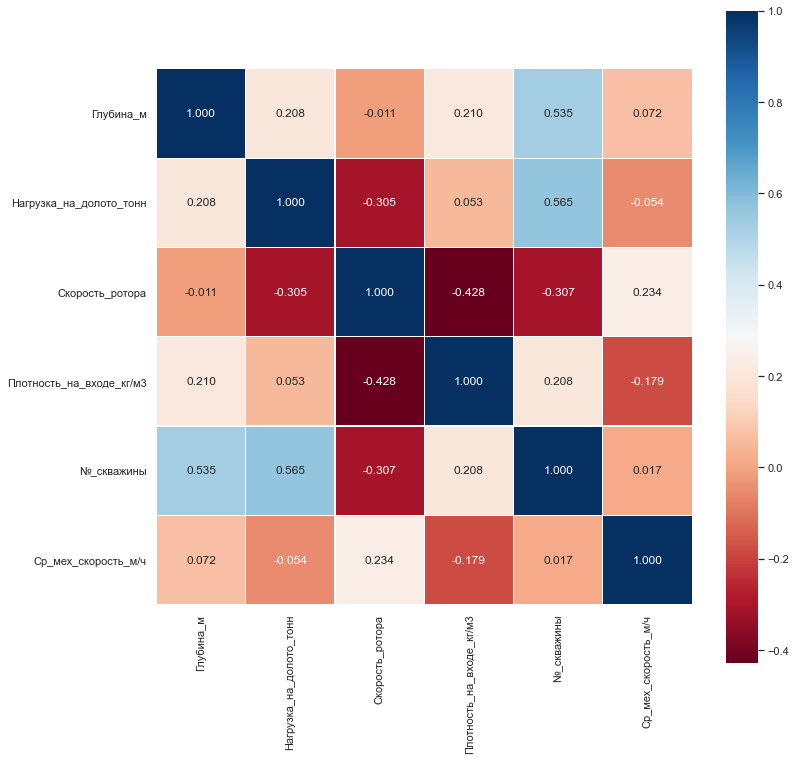

In [36]:
X=data_sq.iloc[:,1:-1]
y=data_sq['Ср_мех_скорость_м/ч']
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");

##### Логарифмы

In [37]:
data_log=np.log(data)
data_log.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
13731,9.527411,7.272398,2.564949,-inf,0.04879,0.693147,3.113515
13732,9.527484,7.272468,2.639057,-inf,0.04879,0.693147,3.488210
13733,9.527557,7.272537,2.708050,-inf,0.04879,0.693147,3.321154
13734,9.527630,7.272607,2.564949,-inf,0.04879,0.693147,2.708050
13735,9.527703,7.272676,2.564949,-inf,0.04879,0.693147,3.321154


In [38]:
X=data_log.iloc[:,1:-1]
X.head()

,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины
13731,7.272398,2.564949,-inf,0.04879,0.693147
13732,7.272468,2.639057,-inf,0.04879,0.693147
13733,7.272537,2.708050,-inf,0.04879,0.693147
13734,7.272607,2.564949,-inf,0.04879,0.693147
13735,7.272676,2.564949,-inf,0.04879,0.693147


In [39]:
y=data_log['Ср_мех_скорость_м/ч']

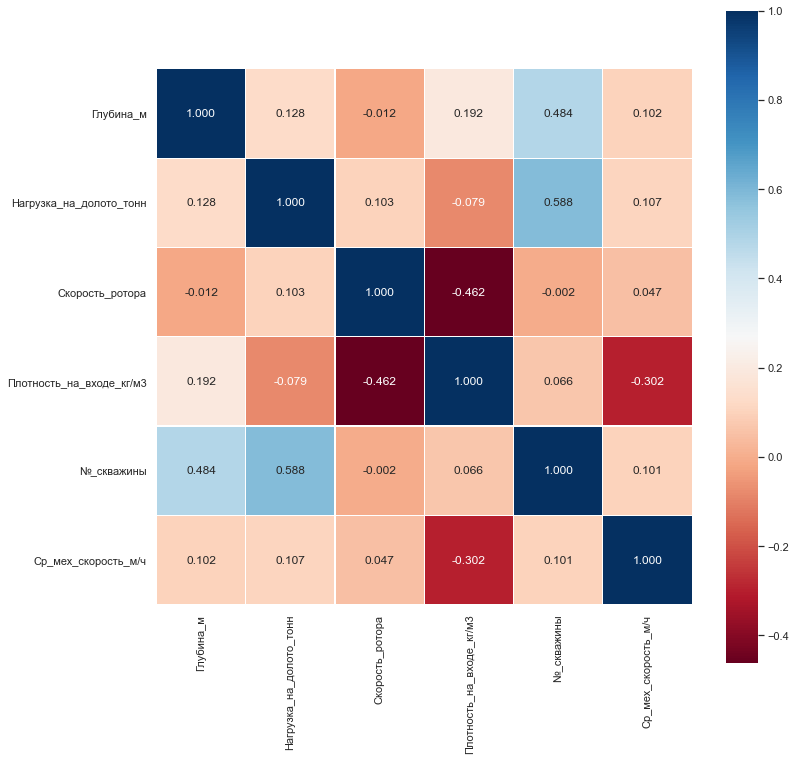

In [40]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");